# Importing library

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

# Loading the data

In [5]:
df=pd.read_csv(r"C:\Users\JEEVAN\Documents\vinod sir notes\Jeevan raj kaggle project\3. fish market using logistic regression\Fish.csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [7]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [8]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [9]:
df.nunique()

Species      7
Weight     101
Length1    116
Length2     93
Length3    124
Height     154
Width      152
dtype: int64

## will perform labelencoading for target variable

In [10]:
from sklearn.preprocessing import LabelEncoder

In [11]:
label_encoder=LabelEncoder()
df['Species']=label_encoder.fit_transform(df['Species'])
df['Species']

0      0
1      0
2      0
3      0
4      0
      ..
154    5
155    5
156    5
157    5
158    5
Name: Species, Length: 159, dtype: int32

In [12]:
df.Species.value_counts()

2    56
0    35
4    20
3    17
5    14
1    11
6     6
Name: Species, dtype: int64

In [13]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0,430.0,26.5,29.0,34.0,12.4440,5.1340


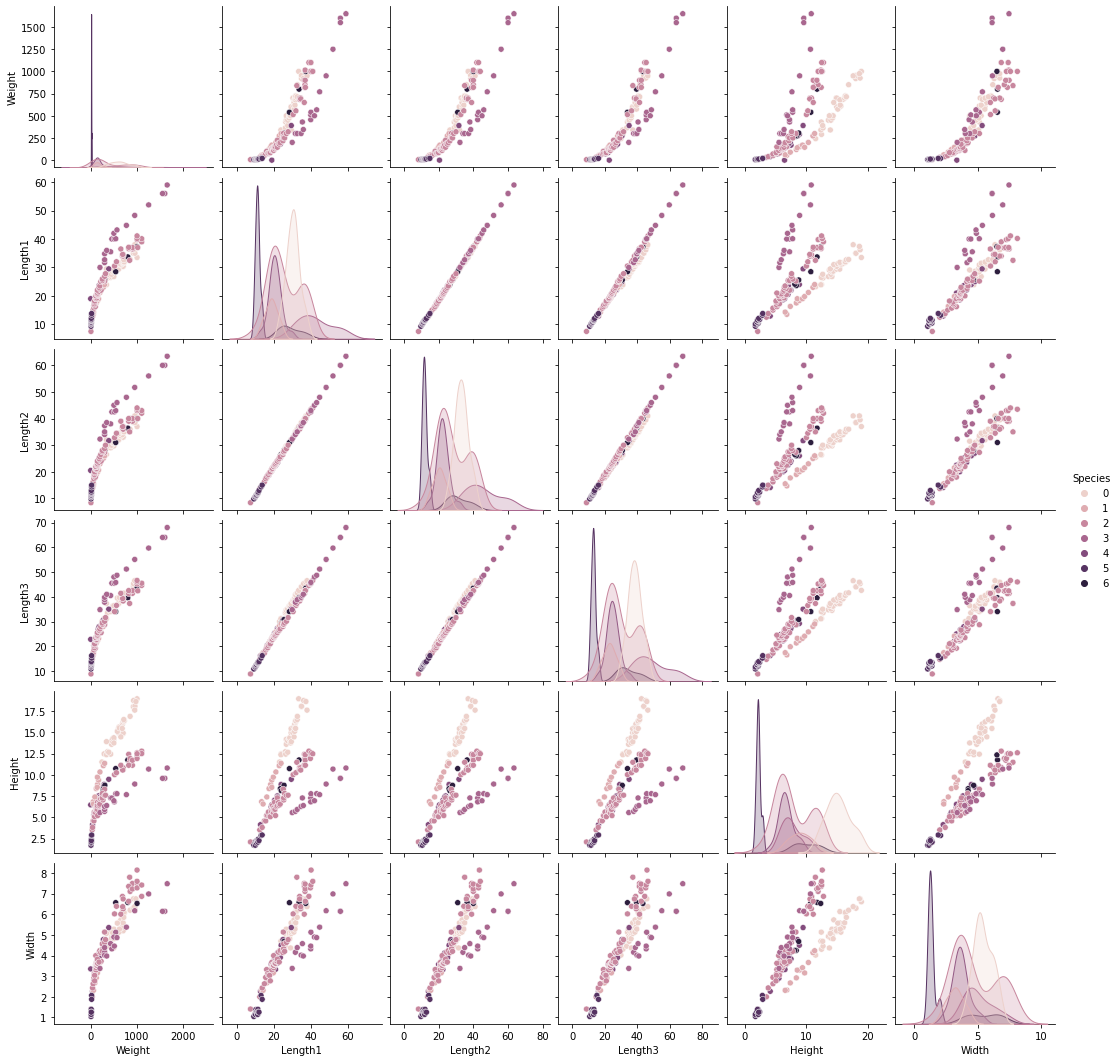

In [14]:
# will plot the pairplot to the entire dataset and visualize the data to perform the machine model
sns.pairplot(df,hue='Species')

# Multicollinearity

<AxesSubplot:>

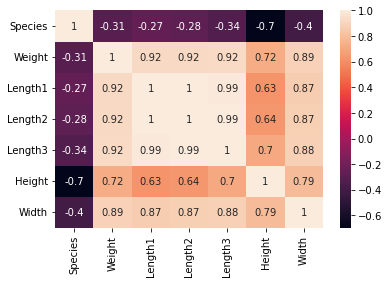

In [17]:
sns.heatmap(df.corr(),annot=True)

# Model: Logistic Regression

In [52]:
from sklearn.model_selection import train_test_split

X=df.loc[:,df.columns!='Species']
y=df.loc[:,df.columns=='Species']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=27)

# Initiatlize the model

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [54]:
logreg=LogisticRegression(solver='liblinear',random_state=0)

# fit the model

In [55]:
logreg.fit(X_train,y_train)

LogisticRegression(random_state=0, solver='liblinear')

# predicting the model

In [56]:
y_pred=logreg.predict(X_test)

# Printing the accuracy Score

In [57]:
print(f'Model Accuracy Score: {round(accuracy_score(y_test,y_pred)*100,2)}%')

Model Accuracy Score: 93.75%


In [58]:
# Additional Metrics

print(f'Training set score:{round(logreg.score(X_train,y_train)*100,2)}%')
print(f'Training set score:{round(logreg.score(X_test,y_test)*100,2)}%')

Training set score:95.5%
Training set score:93.75%


In [68]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix(y_test,y_pred)

array([[ 7,  0,  0,  0,  0,  0,  0],
       [ 0,  3,  0,  0,  0,  0,  0],
       [ 0,  0, 20,  0,  0,  0,  0],
       [ 0,  0,  0,  6,  0,  0,  0],
       [ 0,  0,  0,  0,  4,  1,  0],
       [ 0,  0,  0,  0,  0,  5,  0],
       [ 0,  0,  2,  0,  0,  0,  0]], dtype=int64)

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         3
           2       0.91      1.00      0.95        20
           3       1.00      1.00      1.00         6
           4       1.00      0.80      0.89         5
           5       0.83      1.00      0.91         5
           6       0.00      0.00      0.00         2

    accuracy                           0.94        48
   macro avg       0.82      0.83      0.82        48
weighted avg       0.90      0.94      0.92        48

